# Machine Learning

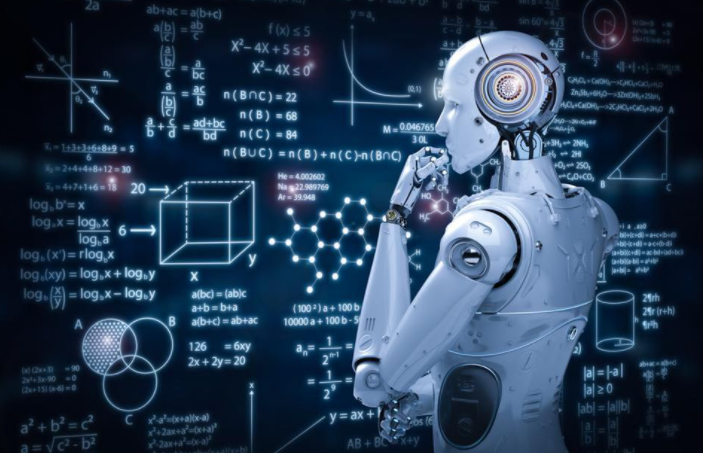

[source](https://www.forbes.com/sites/kalevleetaru/2019/01/15/why-machine-learning-needs-semantics-not-just-statistics/?sh=58c27c7977b5)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3 as sql
import seaborn as sns
import sklearn as sk 
import numpy as np

#library for machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [2]:
db = 'project_2.db'
conn = sql.connect(db)

To close connection

In [23]:
conn.close()

#### Reading data from sqlite3 database as a pandas dataframe

In [3]:
df = pd.read_sql("SELECT * from updated_airbnb2017", conn, index_col='index')
df

,id,host_is_superhost,host_has_profile_pic,neighbourhood_cleansed,latitude,longitude,is_location_exact,property_type,room_type,accommodates,...,availability_30,number_of_reviews,review_scores_rating,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,reviews_per_month,wifi_access,borough
index,,,,,,,,,,,,,,,,,,,,,
0,18461891,f,t,Ditmars Steinway,40.774142,-73.916246,t,Apartment,Entire home/apt,2,...,0,0,0.0,f,f,strict,f,0.00,t,Queens
1,20702398,f,t,City Island,40.849191,-73.786509,f,House,Private room,2,...,19,2,100.0,f,f,moderate,f,2.00,t,Bronx
2,6627449,f,t,City Island,40.849775,-73.786609,t,Apartment,Entire home/apt,3,...,28,21,95.0,f,f,strict,f,0.77,t,Bronx
3,19949243,f,t,City Island,40.848838,-73.782276,f,Boat,Entire home/apt,4,...,30,0,0.0,t,f,strict,f,0.00,f,Bronx
4,1886820,f,t,City Island,40.841144,-73.783052,t,House,Entire home/apt,4,...,30,0,0.0,f,f,strict,f,0.00,t,Bronx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44312,20530309,f,t,Flatlands,40.618675,-73.932736,f,Apartment,Private room,1,...,30,1,100.0,t,f,flexible,f,0.81,t,Brooklyn
44313,20459907,f,t,Bushwick,40.684681,-73.905174,t,Apartment,Entire home/apt,6,...,4,0,0.0,t,f,strict,f,0.00,t,Brooklyn
44314,4287386,f,t,Rockaway Beach,40.583865,-73.819245,f,Apartment,Entire home/apt,4,...,1,6,87.0,f,f,moderate,f,3.91,f,Queens


#### Checking the different categories for columns

In [74]:
def see_possible_categories(columns):
    for item in columns:
        a = df[item].unique()
        print(f'printing the different categories in {item} column: {a}')

lst = ['room_type','borough','property_type']
see_possible_categories(lst)

printing the different categories in room_type column: ['Entire home/apt' 'Private room' 'Shared room']
printing the different categories in borough column: ['Queens' 'Bronx' 'Brooklyn' 'Staten Island' 'Manhattan']
printing the different categories in property_type column: ['Apartment' 'House' 'Boat' 'Townhouse' 'Condominium' 'Loft' 'Dorm'
 'Earth House' 'Other' 'Bed & Breakfast' 'Guesthouse' 'Guest suite'
 'Vacation home' 'Bungalow' 'Timeshare' 'Hostel' 'Chalet' 'In-law'
 'Treehouse' 'Tent' 'Serviced apartment' 'Villa' 'Yurt' 'Cabin'
 'Boutique hotel' 'Cave' 'Castle' 'Train']


#### df.nunique() is returning the number of distinct observations per column

In [184]:
df.nunique() 

id                               44317
host_is_superhost                    2
host_has_profile_pic                 2
neighbourhood_cleansed             217
latitude                         44261
longitude                        44207
is_location_exact                    2
property_type                       28
room_type                            3
accommodates                        16
bathrooms                           17
bedrooms                            12
beds                                19
bed_type                             5
amenities                        39721
price                              621
guests_included                     16
minimum_nights                      66
maximum_nights                     265
calendar_updated                    76
availability_30                     31
number_of_reviews                  295
review_scores_rating                54
instant_bookable                     2
is_business_travel_ready             2
cancellation_policy      

## One-hot encoding for boroughs and wifi columns

### Wifi

In [49]:
df["wifi_access_num"] = df["wifi_access"].apply(lambda x: 1 if "t" in x else 0)
df

,id,host_is_superhost,host_has_profile_pic,neighbourhood_cleansed,latitude,longitude,is_location_exact,property_type,room_type,accommodates,...,reviews_per_month,wifi_access,borough,wifi_access_num,queens,bronx,brooklyn,staten_island,manhattan,borough_num
index,,,,,,,,,,,,,,,,,,,,,
0,18461891,f,t,Ditmars Steinway,40.774142,-73.916246,t,Apartment,Entire home/apt,2,...,0.00,t,Queens,1,1,0,0,0,0,0
1,20702398,f,t,City Island,40.849191,-73.786509,f,House,Private room,2,...,2.00,t,Bronx,1,0,1,0,0,0,1
2,6627449,f,t,City Island,40.849775,-73.786609,t,Apartment,Entire home/apt,3,...,0.77,t,Bronx,1,0,1,0,0,0,1
3,19949243,f,t,City Island,40.848838,-73.782276,f,Boat,Entire home/apt,4,...,0.00,f,Bronx,0,0,1,0,0,0,1
4,1886820,f,t,City Island,40.841144,-73.783052,t,House,Entire home/apt,4,...,0.00,t,Bronx,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44312,20530309,f,t,Flatlands,40.618675,-73.932736,f,Apartment,Private room,1,...,0.81,t,Brooklyn,1,0,0,1,0,0,2
44313,20459907,f,t,Bushwick,40.684681,-73.905174,t,Apartment,Entire home/apt,6,...,0.00,t,Brooklyn,1,0,0,1,0,0,2
44314,4287386,f,t,Rockaway Beach,40.583865,-73.819245,f,Apartment,Entire home/apt,4,...,3.91,f,Queens,0,1,0,0,0,0,0


### Boroughs

#### Changing boroughs to numerical values for linear regression model

In [50]:
boroughs = ['Queens','Bronx','Brooklyn','Staten Island','Manhattan']

for borough in boroughs:
    df[borough.lower()] = df["borough"].apply(lambda x: 1 if borough in x else 0)

In [6]:
df.rename(columns = {'staten island': 'staten_island'}, inplace = True)

#### Adding a column 'borough_num' to change the boroughs into 1-5 categories for mutinomial logistic regression

In [8]:
dct = {'Queens':0, 'Bronx':1, 'Brooklyn':2,'Staten Island':3,'Manhattan':4}

df["borough_num"] = df["borough"].apply(lambda x: dct[x])

In [51]:
df

,id,host_is_superhost,host_has_profile_pic,neighbourhood_cleansed,latitude,longitude,is_location_exact,property_type,room_type,accommodates,...,wifi_access,borough,wifi_access_num,queens,bronx,brooklyn,staten_island,manhattan,borough_num,staten island
index,,,,,,,,,,,,,,,,,,,,,
0,18461891,f,t,Ditmars Steinway,40.774142,-73.916246,t,Apartment,Entire home/apt,2,...,t,Queens,1,1,0,0,0,0,0,0
1,20702398,f,t,City Island,40.849191,-73.786509,f,House,Private room,2,...,t,Bronx,1,0,1,0,0,0,1,0
2,6627449,f,t,City Island,40.849775,-73.786609,t,Apartment,Entire home/apt,3,...,t,Bronx,1,0,1,0,0,0,1,0
3,19949243,f,t,City Island,40.848838,-73.782276,f,Boat,Entire home/apt,4,...,f,Bronx,0,0,1,0,0,0,1,0
4,1886820,f,t,City Island,40.841144,-73.783052,t,House,Entire home/apt,4,...,t,Bronx,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44312,20530309,f,t,Flatlands,40.618675,-73.932736,f,Apartment,Private room,1,...,t,Brooklyn,1,0,0,1,0,0,2,0
44313,20459907,f,t,Bushwick,40.684681,-73.905174,t,Apartment,Entire home/apt,6,...,t,Brooklyn,1,0,0,1,0,0,2,0
44314,4287386,f,t,Rockaway Beach,40.583865,-73.819245,f,Apartment,Entire home/apt,4,...,f,Queens,0,1,0,0,0,0,0,0


# We built two types of machine learning models:

## 1) Linear Regression

#### Hypothesis: The following features are the best predictors for price of airbnb listings:

    - Boroughs
    - Accommodates
    - Bathrooms
    - Bedrooms
    - Beds
    - Number of guest included (in price)

## 2) Multinomial Linear Regression

#### Hypothesis: The following features are the best predictors for location of airbnb listings:

    - Accommodates
    - Bathrooms
    - Bedrooms
    - Beds
    - Number of guest included 
    - Minimun nights
    - price

## Feature Engineering

#### computing pairwise correlation of columns

In [11]:
df_corr = df.corr()
df_corr

,id,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,guests_included,minimum_nights,...,number_of_reviews,review_scores_rating,reviews_per_month,wifi_access_num,queens,bronx,brooklyn,staten_island,manhattan,borough_num
id,1.000000,-0.002276,0.096821,-0.000563,0.023218,-0.013827,0.010858,-0.036372,-0.048237,-0.044580,...,-0.365833,-0.149289,0.170569,-0.018895,0.074434,0.039806,-0.021680,0.008830,-0.035193,-0.063483
latitude,-0.002276,1.000000,0.092032,-0.037834,-0.062284,-0.070980,-0.051026,0.034368,-0.036346,-0.001351,...,0.005881,-0.009712,0.004522,-0.008404,0.024675,0.297224,-0.686059,-0.172737,0.613081,0.409787
longitude,0.096821,0.092032,1.000000,-0.031121,0.005411,0.018270,-0.000065,-0.159024,0.017579,-0.027312,...,0.009025,-0.007038,0.098977,-0.037043,0.602139,0.218201,0.049971,-0.282273,-0.422444,-0.628472
accommodates,-0.000563,-0.037834,-0.031121,1.000000,0.359874,0.645502,0.803350,0.375917,0.574227,-0.023716,...,0.109311,0.077622,0.127239,0.044040,-0.000115,-0.015017,-0.012665,0.031185,0.011508,0.012120
bathrooms,0.023218,-0.062284,0.005411,0.359874,1.000000,0.420962,0.408833,0.262224,0.213264,0.005211,...,-0.013008,-0.012214,0.006465,0.016730,-0.015796,-0.003377,0.061410,0.029445,-0.055179,-0.032243
bedrooms,-0.013827,-0.070980,0.018270,0.645502,0.420962,1.000000,0.676773,0.282948,0.443296,-0.005628,...,0.029271,0.010871,0.029279,0.027081,0.014285,-0.011466,0.067019,0.032544,-0.077119,-0.061318
beds,0.010858,-0.051026,-0.000065,0.803350,0.408833,0.676773,1.000000,0.300546,0.520559,-0.008347,...,0.089279,0.053009,0.111435,0.032599,0.022177,-0.003630,0.002338,0.042278,-0.021531,-0.023247
price,-0.036372,0.034368,-0.159024,0.375917,0.262224,0.282948,0.300546,1.000000,0.202474,0.016183,...,-0.021903,-0.051679,-0.047936,-0.017758,-0.076211,-0.037880,-0.109031,-0.008268,0.164965,0.161750
guests_included,-0.048237,-0.036346,0.017579,0.574227,0.213264,0.443296,0.520559,0.202474,1.000000,-0.016762,...,0.141323,0.115231,0.141931,0.044024,0.028761,-0.017591,0.006517,0.024004,-0.022927,-0.026991
minimum_nights,-0.044580,-0.001351,-0.027312,-0.023716,0.005211,-0.005628,-0.008347,0.016183,-0.016762,1.000000,...,-0.048020,-0.025076,-0.083546,-0.000023,-0.014372,-0.010773,-0.001882,-0.007174,0.014509,0.018033


#### Visualizing correlations between columns

In [12]:
df_corr.style.background_gradient(cmap='coolwarm', axis=None)

,id,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,guests_included,minimum_nights,maximum_nights,availability_30,number_of_reviews,review_scores_rating,reviews_per_month,wifi_access_num,queens,bronx,brooklyn,staten_island,manhattan,borough_num
id,1.000000,-0.002276,0.096821,-0.000563,0.023218,-0.013827,0.010858,-0.036372,-0.048237,-0.044580,-0.004380,0.065134,-0.365833,-0.149289,0.170569,-0.018895,0.074434,0.039806,-0.021680,0.008830,-0.035193,-0.063483
latitude,-0.002276,1.000000,0.092032,-0.037834,-0.062284,-0.070980,-0.051026,0.034368,-0.036346,-0.001351,0.005089,-0.032622,0.005881,-0.009712,0.004522,-0.008404,0.024675,0.297224,-0.686059,-0.172737,0.613081,0.409787
longitude,0.096821,0.092032,1.000000,-0.031121,0.005411,0.018270,-0.000065,-0.159024,0.017579,-0.027312,-0.001826,0.203490,0.009025,-0.007038,0.098977,-0.037043,0.602139,0.218201,0.049971,-0.282273,-0.422444,-0.628472
accommodates,-0.000563,-0.037834,-0.031121,1.000000,0.359874,0.645502,0.803350,0.375917,0.574227,-0.023716,-0.004988,0.045252,0.109311,0.077622,0.127239,0.044040,-0.000115,-0.015017,-0.012665,0.031185,0.011508,0.012120
bathrooms,0.023218,-0.062284,0.005411,0.359874,1.000000,0.420962,0.408833,0.262224,0.213264,0.005211,-0.001936,0.051566,-0.013008,-0.012214,0.006465,0.016730,-0.015796,-0.003377,0.061410,0.029445,-0.055179,-0.032243
bedrooms,-0.013827,-0.070980,0.018270,0.645502,0.420962,1.000000,0.676773,0.282948,0.443296,-0.005628,-0.007738,0.050932,0.029271,0.010871,0.029279,0.027081,0.014285,-0.011466,0.067019,0.032544,-0.077119,-0.061318
beds,0.010858,-0.051026,-0.000065,0.803350,0.408833,0.676773,1.000000,0.300546,0.520559,-0.008347,-0.002826,0.054138,0.089279,0.053009,0.111435,0.032599,0.022177,-0.003630,0.002338,0.042278,-0.021531,-0.023247
price,-0.036372,0.034368,-0.159024,0.375917,0.262224,0.282948,0.300546,1.000000,0.202474,0.016183,-0.000931,0.075839,-0.021903,-0.051679,-0.047936,-0.017758,-0.076211,-0.037880,-0.109031,-0.008268,0.164965,0.161750
guests_included,-0.048237,-0.036346,0.017579,0.574227,0.213264,0.443296,0.520559,0.202474,1.000000,-0.016762,-0.002674,0.032224,0.141323,0.115231,0.141931,0.044024,0.028761,-0.017591,0.006517,0.024004,-0.022927,-0.026991
minimum_nights,-0.044580,-0.001351,-0.027312,-0.023716,0.005211,-0.005628,-0.008347,0.016183,-0.016762,1.000000,-0.001003,0.008959,-0.048020,-0.025076,-0.083546,-0.000023,-0.014372,-0.010773,-0.001882,-0.007174,0.014509,0.018033


#### Visualizing relationship between features and price

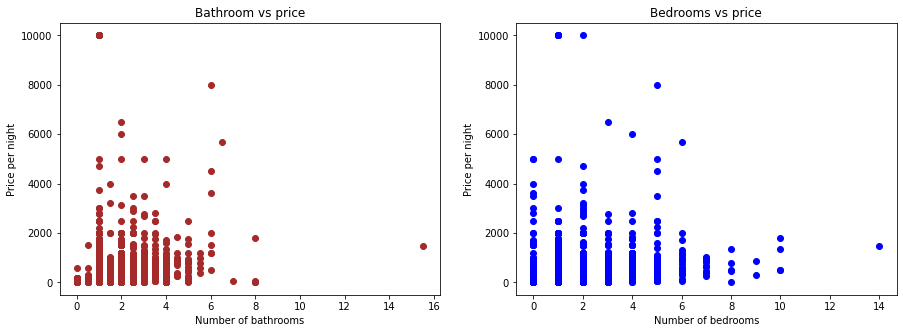

In [12]:
fig, (axes1, axes2) = plt.subplots(1,2, figsize=(15,5))
axes1.set(title="Bathroom vs price")
axes1.scatter(df['bathrooms'], df['price'], color = 'brown')
labels = axes1.get_xticklabels()
axes1.set(xlabel='Number of bathrooms', ylabel='Price per night',\
       title="Bathroom vs price")

axes2.set(title="Bathroom vs price")

axes2.scatter(df['bedrooms'], df['price'], color = 'blue')
labels = axes2.get_xticklabels()
axes2.set(xlabel='Number of bedrooms', ylabel='Price per night',\
       title="Bedrooms vs price")

plt.show()

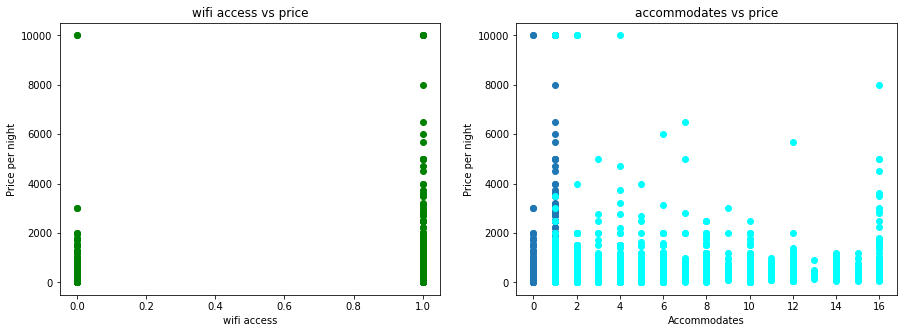

In [13]:
fig, (axes1, axes2) = plt.subplots(1,2, figsize=(15,5))
# axes1.set(title="Bathroom vs price")
axes1.scatter(df['wifi_access_num'], df['price'], color = 'green')
labels = axes1.get_xticklabels()
axes1.set(xlabel='wifi access', ylabel='Price per night',\
       title="wifi access vs price")
plt.scatter(df['wifi_access_num'], df['price'])

# axes2.set(title="Bathroom vs price")
axes2.scatter(df['accommodates'], df['price'], color = 'aqua')
labels = axes2.get_xticklabels()
axes2.set(xlabel='Accommodates', ylabel='Price per night',\
       title="accommodates vs price")

plt.show()

In [13]:
df.sort_values('minimum_nights', ascending = False)['minimum_nights'].head(20)

index
21104    1250
1435     1000
19538     500
12337     500
22192     500
18140     365
41569     365
16956     365
10606     365
26283     365
29504     365
40191     365
22205     365
30206     365
29209     365
28720     300
16865     300
26759     270
41268     230
38810     200
Name: minimum_nights, dtype: int64

##### First removing outliers from price and minimum columns

In [14]:
no_outliers_df= df.loc[(df['price']>10) & (df['price']<4000) & (df['minimum_nights'] <500), :]

In [54]:
no_outliers_df.shape

(44230, 37)

# We built two types of machine learning models:

## 1) Linear Regression

#### Hypothesis: The following features are the best predictors for price of airbnb listings:

    - Boroughs
    - Accommodates
    - Bathrooms
    - Bedrooms
    - Beds
    - Number of guest included (in price)

## 2) Multinomial Linear Regression

#### Hypothesis: The following features are the best predictors for location of airbnb listings:

    - Accommodates
    - Bathrooms
    - Bedrooms
    - Beds
    - Number of guest included 
    - Minimun nights
    - price

## Linear Regression Models

### 1) Does location have a strong correlation with the price of airbnb? 

#### Independent variables

In [16]:
X = no_outliers_df[['queens', 'bronx','brooklyn', 'staten_island', 'manhattan']]

#### Dependent variable for both linear regression models

In [17]:
Y = no_outliers_df['price']

#### Splitting data into testing and training data, which is used to train the model

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

#### We create an object from the class LinearRegression from sklearn, a machine learning library in python.
fit method finds the line that minimizes the sum of the squares of the residuals - the distance between the predicted values and the actual values. It uses the concept of Ordinary Least Squares to find the line with the smallest error using gradient descent. This line becomes our linear regression model

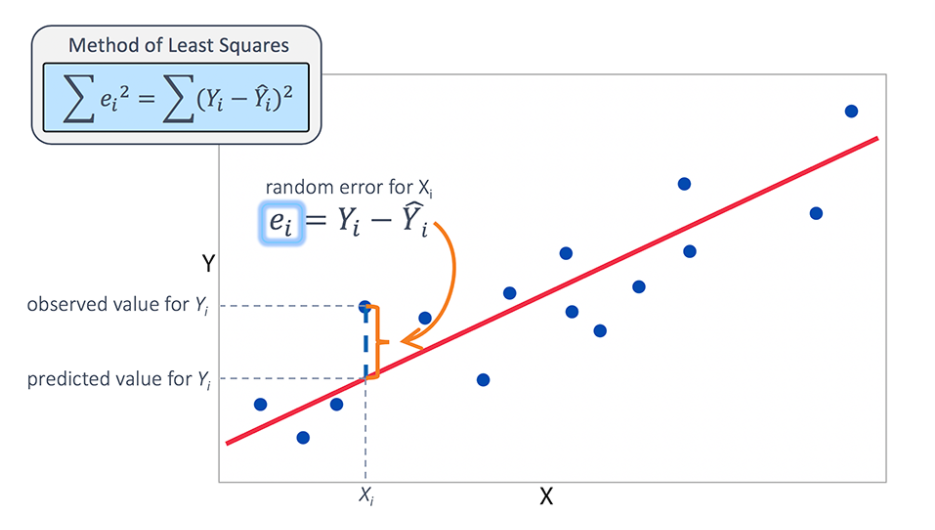

source: [Fitting the Multiple Linear Regression Model](https://www.jmp.com/en_hk/statistics-knowledge-portal/what-is-multiple-regression/fitting-multiple-regression-model.html)

In [55]:
reg = LinearRegression(fit_intercept=False) 

reg.fit(X_train.values, Y_train.values)

LinearRegression(fit_intercept=False)

#### Calculating the score of the linear regression model, which is also known as the coefficient of determination. This gives us information about the "goodness of fit" of the model to the training data. The score ranges between 0 and 1, where 1 implies that the dependent variable is perfectly predictable from the independent variable, while 0 implies that it is not.

In [21]:
score = reg.score(X_test.values, Y_test.values)

In [22]:
print(f'Score {score}')

Score 0.046788507873287255


#### Using the model that was built from the training data to predict outputs or y values

In [23]:
Y_pred = reg.predict(X_test.values)

In [24]:
Y_pred

array([181.68802022, 181.68802022, 118.5974333 , ..., 181.68802022,
       118.5974333 , 118.5974333 ])

### Visualizations of Predicted and Actual Values

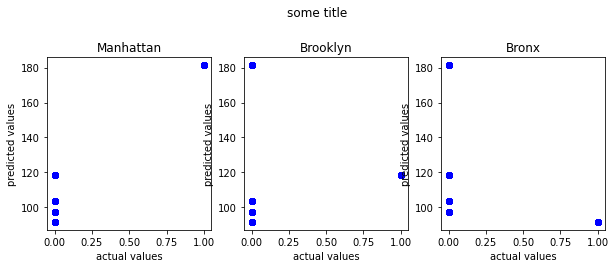

In [71]:
#showing the 
plt.figure(figsize = (10,7))
plt.suptitle('some title')

plt.subplot(2,3,1)
#plt.scatter(X_test['manhattan'], Y_test,  color='red') #actual data from test data
plt.scatter(X_test['manhattan'], Y_pred, color='blue')  
plt.xlabel("actual values")
plt.ylabel("predicted values")
plt.title("Manhattan")

plt.subplot(2,3,2)
#plt.scatter(X_test['brooklyn'], Y_test,  color='red') #actual data from test data
plt.scatter(X_test['brooklyn'], Y_pred, color='blue')  
plt.xlabel("actual values")
plt.ylabel("predicted values")
plt.title("Brooklyn")

plt.subplot(2,3,3)
#plt.scatter(X_test['bronx'], Y_test,  color='red') #actual data from test data
plt.scatter(X_test['bronx'], Y_pred, color='blue')  
plt.xlabel("actual values")
plt.ylabel("predicted values")
plt.title("Bronx")

plt.show()

## Calculating errors to see how much the actual values deviate from the predicted values:

MAE (mean absolute error)
   - simplest regression error metric to understand
   - takes absolute values of residuals
   - describes the typical magnitude of the residuals

MSE (mean square error)
   - same as MSE, but squares the difference before summing them all instead of using the absolute value
   - MSE will almost always be bigger than the MAE, which is why we can only compare our model's error metrics to those of a competing model
   - most apparent in the presence of outliers
   
MAPE (mean absolute percentage error)
   - percentage equivalent of MAE
   - the presence of a division means for very small values of y, the MAPE can be extremely large and the MAPE cannot be calculated if y = 0

In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, \
                            mean_absolute_percentage_error

print(f"MAE: {mean_absolute_error(Y_test, Y_pred)}")
print(f"MSE: {mean_squared_error(Y_test, Y_pred)}")
print(f"MAPE: {mean_absolute_percentage_error(Y_test, Y_pred)}")

MAE: 79.47188487130329
MSE: 26323.90073773707
MAPE: 0.7173335329378511


## 2) Are the number of accomodates, bathrooms, bedrooms, guest included, mininum nights and beds strong indicators of airbnb prices?

#### Independent variables/Features

In [26]:
x = no_outliers_df[['accommodates', 'bathrooms', 'bedrooms', 'guests_included', 'beds', 'minimum_nights']]

#### Splitting data into training and testing sets

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

#### Fitting data into a linear regression model

In [29]:
reg = LinearRegression(fit_intercept=False) 

reg.fit(x_train.values, y_train.values)

LinearRegression(fit_intercept=False)

#### calculating the coefficient of determination

In [30]:
score = round(reg.score(x_test.values, y_test.values),3)

In [31]:
print(f'Model has a score of {score}, showing a low correlation between the given features and price of airbnb')

Model has a score of 0.27, showing a low correlation between the given features and price of airbnb


In [32]:
y_pred = reg.predict(x_test.values)

In [33]:
y_pred

array([ 79.89612316, 180.54651566, 116.64681983, ...,  79.89612316,
       264.01415738, 115.47042571])

In [34]:
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"MAPE: {mean_absolute_percentage_error(y_test, y_pred)}")

MAE: 67.37350123419965
MSE: 16071.89444531851
MAPE: 0.6067620375072404


graphs for predicted and actual values

In [ ]:
# df.to_sql("updated_airbnb2017", conn, if_exists="replace")

# Multinomial Logistic Regression

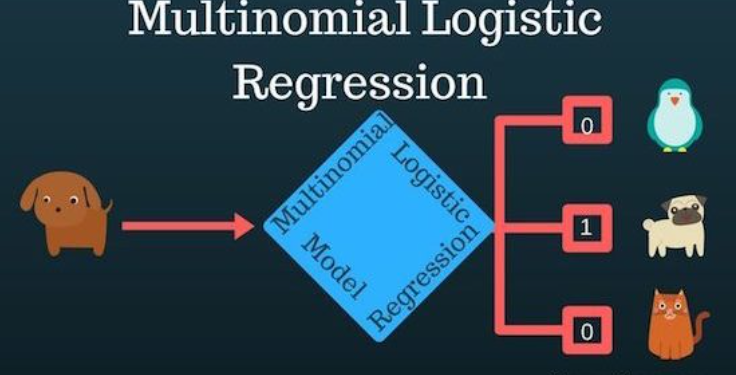

[source](https://opendatascience.com/how-the-multinomial-logistic-regression-model-works/)

## Three multinomial logistic regression models were built to see whether the following features can predict the location of airbnbs: number of accomodates, beds, price, bathrooms, bedrooms, and guest included. The same dependent variable was used for all three models.

### 1) Can the number of accommodates, bathrooms, bedrooms, guests included, and beds predict the location of an airbnb listing?

In [84]:
#independent variables
independent = no_outliers_df[['accommodates', 'bathrooms', 'bedrooms', 'guests_included', 'beds']]

#dependent variables
dependent = no_outliers_df.loc[:,'borough_num'].values

#we split the dataset into testing and training set
train_x, test_x, train_y, test_y = train_test_split(independent,dependent,test_size=.3, random_state=0)
model = LogisticRegression(solver = 'lbfgs', multi_class='multinomial', max_iter=1000)
model.fit(train_x, train_y)
model.score(test_x, test_y)

0.48097068354811967

#### Evaluating and visualizing the performance of logistic regression model

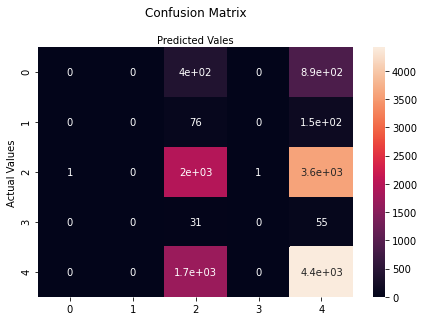

Accuracy: 0.48097068354811967
Precision: 0.48097068354811967


In [85]:
pred_y = model.predict(test_x)
model_matrix = confusion_matrix(test_y, pred_y)

#Confusion matrix
class_names = [1,2,3,4,5]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
sns.heatmap(pd.DataFrame(model_matrix), annot=True) 
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Confusion Matrix", y=1.1)
plt.ylabel("Actual Values")
plt.xlabel("Predicted Vales")
plt.show()

#Calculating the accuracy of the model
print(f'Accuracy: {accuracy_score(test_y,pred_y)}')
print(f"Precision: {precision_score(test_y, pred_y, average='micro')}")

#### Calculating the accuracy of model

In [86]:
print(f'Accuracy: {accuracy_score(test_y,pred_y)}')
print(f"Precision: {precision_score(test_y, pred_y, average='micro')}")

Accuracy: 0.48097068354811967
Precision: 0.48097068354811967


### 2) Performing another multinomial logistic regression to add a new feauture - minimum nights- and increase the training data, in hopes to increase accurary  

In [87]:
additional_x = no_outliers_df[['accommodates', 'bathrooms', 'bedrooms', 'guests_included', 'beds', 'minimum_nights']]

#we split the dataset into testing and training set
x_training, x_testing, y_training, y_testing = train_test_split(additional_x, Y, test_size=.25, random_state=0)
model = LogisticRegression(solver = 'lbfgs', multi_class='multinomial', max_iter=2000)
model.fit(x_training,y_training)
print(f'The score of this model: {model.score(x_testing, y_testing)}')

The score of this model: 0.47739193344185205


#### Evaluating and visualizing the performance of the second model

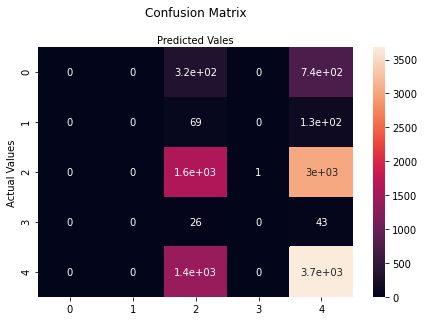

Accuracy: 0.47739193344185205
Precision: 0.47739193344185205


In [89]:
y_predicting = model.predict(x_testing)
matrix = confusion_matrix(y_testing, y_predicting)

#Confusion matrix
class_names = [1,2,3,4,5]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
sns.heatmap(pd.DataFrame(matrix), annot=True) 
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Confusion Matrix", y=1.1)
plt.ylabel("Actual Values")
plt.xlabel("Predicted Vales")

plt.show()

print(f'Accuracy: {accuracy_score(y_testing,y_predicting)}')
print(f"Precision: {precision_score(y_testing, y_predicting, average='micro')}")

### 3) Based on the first two models, we wanted to make changes to increase the score of our multinomial logistic regression. To do this, we added price, numbers of bathrooms, and mininum nights as the features for our third model to predict the location of airbnb listings

score of model: 0.47739193344185205


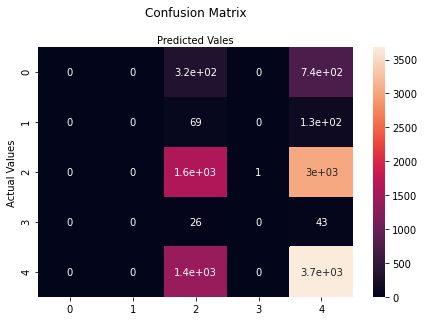

In [90]:
new_features = no_outliers_df[['price', 'bathrooms', 'minimum_nights']]

#we split the dataset into testing and training set
xval_train, xval_test, yval_train, yval_test = train_test_split(new_features, dependent, test_size=.25, random_state=0)
model = LogisticRegression(solver = 'lbfgs', multi_class='multinomial', max_iter=2000)
model.fit(x_training,y_training)
print(f'score of model: {model.score(x_testing, y_testing)}')

#creating confusion matrix to evaluate performance of the model
y_predicting = model.predict(x_testing)
third_matrix = confusion_matrix(y_testing, y_predicting)


class_names = [1,2,3,4,5]

fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
sns.heatmap(pd.DataFrame(third_matrix), annot=True) 
ax.xaxis.set_label_position("top")
plt.tight_layout() 
plt.title("Confusion Matrix", y=1.1)
plt.ylabel("Actual Values")
plt.xlabel("Predicted Vales")
plt.show()

# Conclusion

In our first linear regression model, we tested the effect of the location (NYC 5 boroughs) on price (cost of airbnb listing) and found that the coefficient of determination was the lowest at around 0.04. This might imply that price doesn't depend on which borough the listing is located in.

The second linear regression model, which include all feautures mentioned in the hypothesis except borough, had a higher coefficient of determination of around 0.5. From this, we can conclude that these features might not necessarily the strongest indicators but do have an effect on the price of an airbnb listing.

Futhermore, our first multinomial regression model had a score of 0.481 in predicting the location of a listing based on all the features mentioned in the hypothesis except the minimun nights. We observed that this model couldn't tell the difference the boroughs which could be a sign of underfitting.

In hopes to increase the accuracy of our prediction, we did another multinomial regression model. In the second model, we added an extra feature, minimun nights, and we increase the training size. Even though we increased the training size, the coefficient of determination decreased to 0.4774. This could be due to having bias data to begin with. In other words, our data could contain all luxorious apartments in the boroghs which could mean that the apartment features of the listings are too similar and there is no way for our model to tell them apart.